In [1]:
# Import the Quandl API and configure the API key
import quandl
quandl.ApiConfig.api_key = "icjEB8FYLh6QyycLs6Xf"

In [2]:
# Import more dependencies
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [3]:
# We will use the Quandl service to get the data for six months for AAPL
start = pd.to_datetime('2017-04-01')
end = pd.to_datetime('2017-10-01')
stock_price_df = quandl.get('WIKI/AAPL', start_date=start, end_date=end)

# Print some general information about the results from Quandl
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2017-04-03 to 2017-09-29
Data columns (total 12 columns):
Open           125 non-null float64
High           125 non-null float64
Low            125 non-null float64
Close          125 non-null float64
Volume         125 non-null float64
Ex-Dividend    125 non-null float64
Split Ratio    125 non-null float64
Adj. Open      125 non-null float64
Adj. High      125 non-null float64
Adj. Low       125 non-null float64
Adj. Close     125 non-null float64
Adj. Volume    125 non-null float64
dtypes: float64(12)
memory usage: 12.7 KB


In [4]:
def plot_series(df, columns, last_n, title):
    plot_df = df[columns].tail(last_n)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    plot_df.plot(ax=ax, figsize=(20,8))

In [5]:
# Moving Average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(min_periods=1, center=True, window=n).mean(), name = 'MA_' + str(n))
    df = df.join(MA)
    return df

MOVING AVERAGE


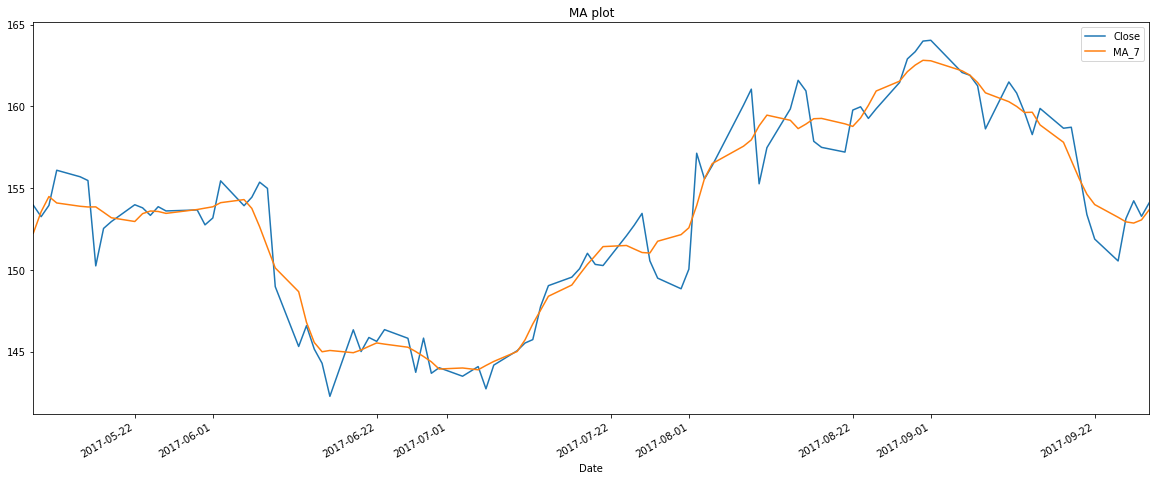

In [7]:
# Printing the Moving Average
print("MOVING AVERAGE")
stock_ma_df = MA(stock_price_df, 7)


# Plot the moving averate for the last 100 days
plot_series(stock_ma_df, ['Close', 'MA_7'], 100, 'MA plot')

In [8]:
# Exponential Moving Average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods = 1).mean(), name='EMA_' + str(n))
    df = df.join(EMA)
    return df

EXPONENTIAL MOVING AVERAGE


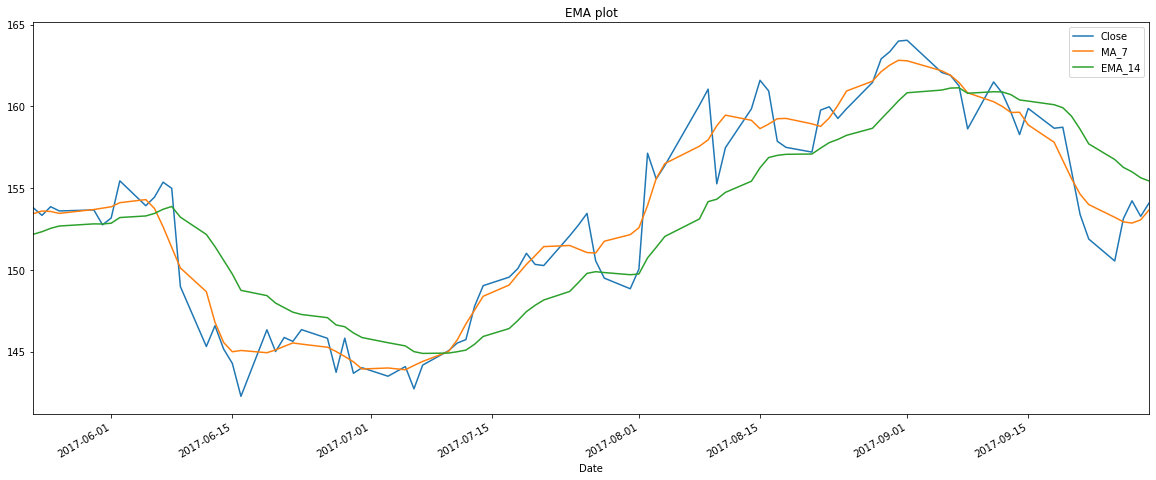

In [9]:
# Printing the Exponential Moving Average
print("EXPONENTIAL MOVING AVERAGE")
stock_ema_df = EMA(stock_ma_df,14)

# Plot the moving averate for the last 90 days
plot_series(stock_ema_df, ['Close', 'MA_7', 'EMA_14'], 90, 'EMA plot')

In [10]:
# Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'MOM_' + str(n))  
    df = df.join(M)  
    return df

MOMENTUM


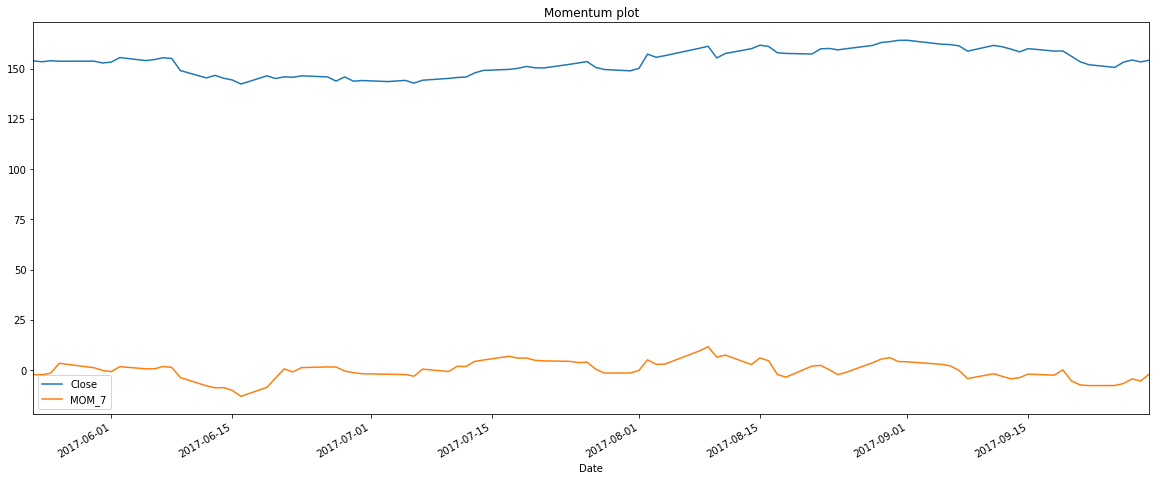

In [11]:
# Printing the Momentum Indicator
print("MOMENTUM")
stock_mom_df = MOM(stock_ema_df, 7)
# print stock_ema_df.info()
# print stock_ema_df.head()

plot_series(stock_mom_df, ['Close', 'MOM_7'], 90, 'Momentum plot')

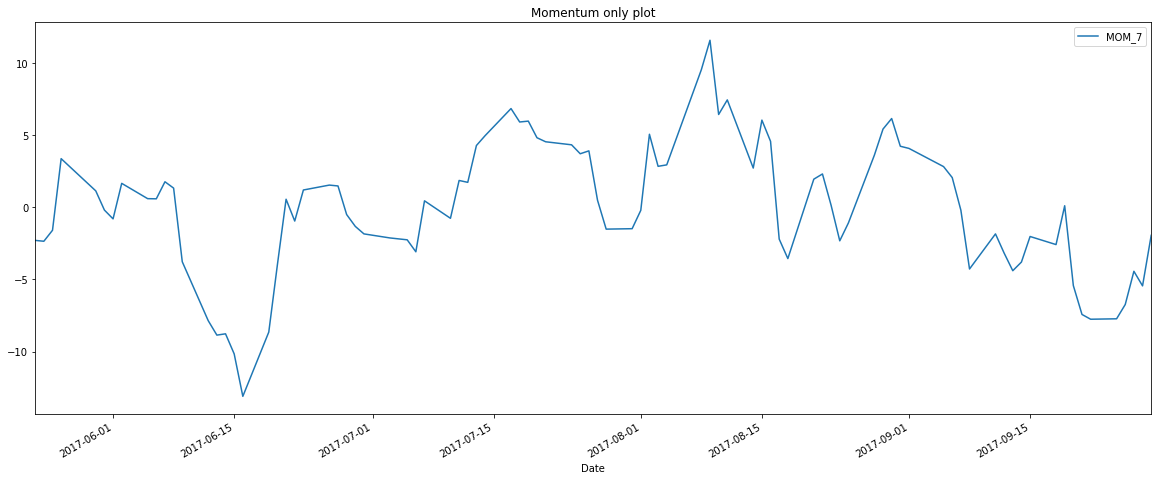

In [12]:
# Plot Momentum only
plot_series(stock_mom_df, ['MOM_7'], 90, 'Momentum only plot')

In [13]:
# Rate of Change (ROC)
def ROC(df, n):  
    M = df['Close'].diff(n - 1)  
    N = df['Close'].shift(n - 1)  
    ROC = pd.Series(M / N, name = 'ROC_' + str(n))  
    df = df.join(ROC)
    return df

RATE OF CHANGE


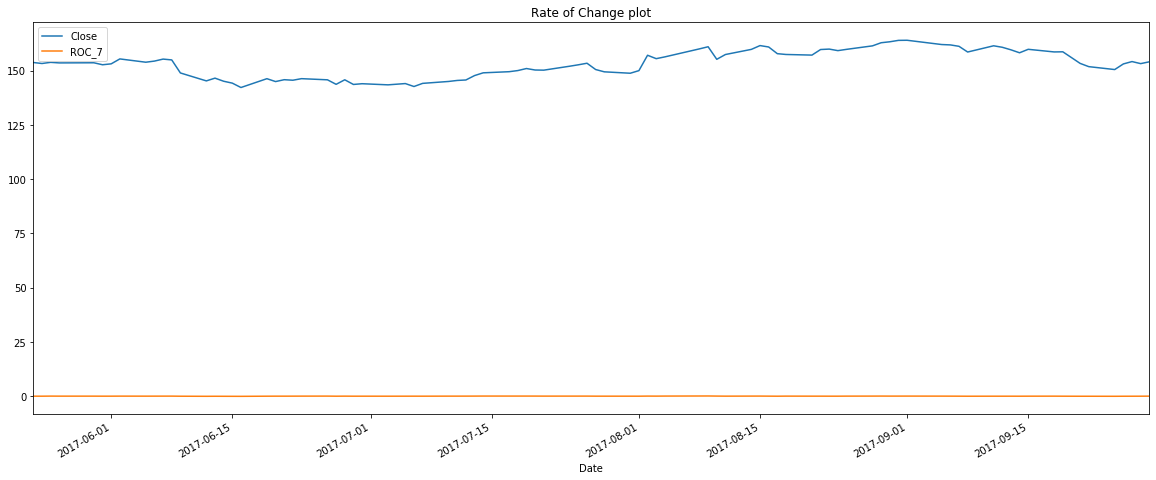

In [14]:
# Printing the ROC Indicator
print("RATE OF CHANGE")
stock_roc_df = ROC(stock_mom_df, 7)
# print stock_ema_df.info()
# print stock_ema_df.head()

plot_series(stock_roc_df, ['Close', 'ROC_7'], 90, 'Rate of Change plot')

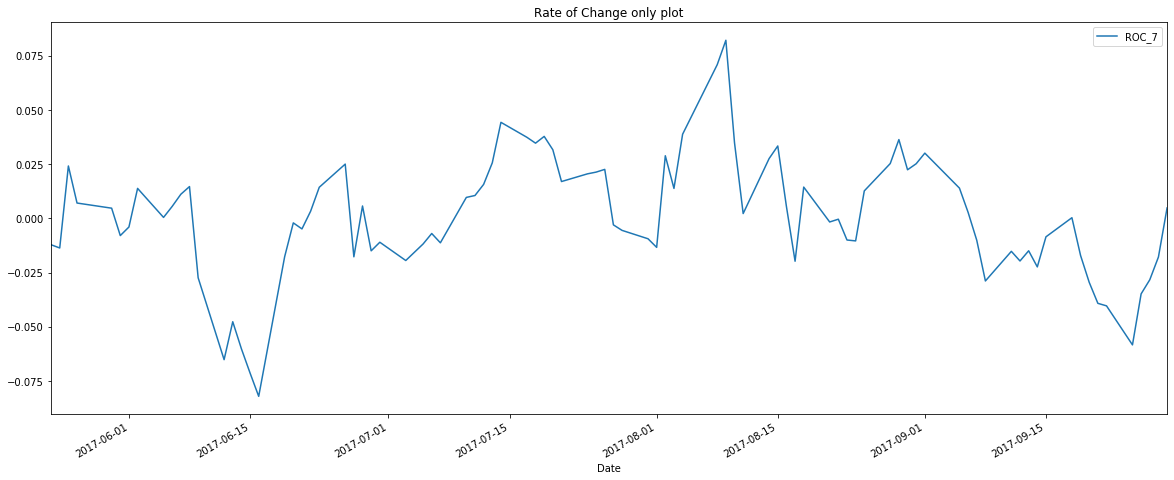

In [15]:
# Plot of the Rate of Change
plot_series(stock_roc_df, ['ROC_7'], 90, 'Rate of Change only plot')

In [16]:
# Implementation of the Moving Average Convergence Divergence (MACD) function
def MACD(df, n_fast, n_slow):
    EMAfast = pd.Series(df['Close'].ewm(span=n_fast, min_periods=1).mean(), name='EMAfast')
    EMAslow = pd.Series(df['Close'].ewm(span=n_slow, min_periods=1).mean(), name='EMAslow')

    name = 'MACD_' + str(n_fast) + '_' + str(n_slow)
    MACD = pd.Series(EMAfast - EMAslow, name = name)
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods = 1).mean(), 
                         name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))

    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df

MACD


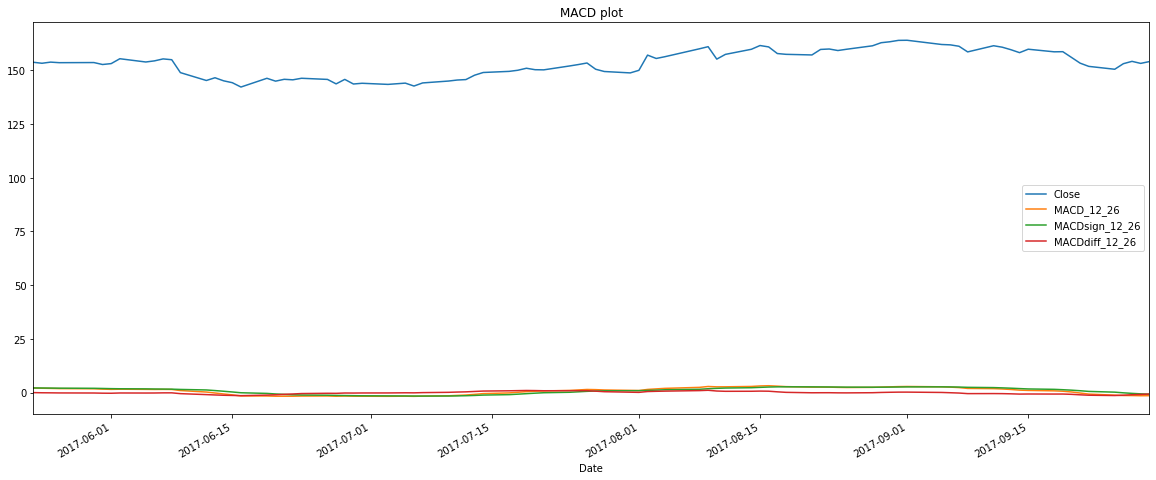

In [17]:
# Printing the Exponential Moving Average
print("MACD")
stock_macd_df = MACD(stock_ema_df,12,26)
# print stock_macd_df.info()
# print stock_macd_df.head()

plot_series(stock_macd_df, ['Close', 'MACD_12_26', 'MACDsign_12_26', 'MACDdiff_12_26'], 90, 'MACD plot')

In [18]:
stock_macd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2017-04-03 to 2017-09-29
Data columns (total 17 columns):
Open              125 non-null float64
High              125 non-null float64
Low               125 non-null float64
Close             125 non-null float64
Volume            125 non-null float64
Ex-Dividend       125 non-null float64
Split Ratio       125 non-null float64
Adj. Open         125 non-null float64
Adj. High         125 non-null float64
Adj. Low          125 non-null float64
Adj. Close        125 non-null float64
Adj. Volume       125 non-null float64
MA_7              125 non-null float64
EMA_14            125 non-null float64
MACD_12_26        125 non-null float64
MACDsign_12_26    125 non-null float64
MACDdiff_12_26    125 non-null float64
dtypes: float64(17)
memory usage: 22.6 KB


In [19]:
stock_macd_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA_7,EMA_14,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
Date,,,,,,,,,,,,,,,,,
2017-04-03,143.71,144.12,143.05,143.70,19985714.0,0.0,1.0,142.545929,142.952608,141.891275,142.536010,19985714.0,144.037500,143.700000,0.000000,0.000000,0.000000
2017-04-04,143.25,144.89,143.17,144.77,19891354.0,0.0,1.0,142.089655,143.716370,142.010303,143.597342,19891354.0,143.898000,144.273214,0.024006,0.013337,0.010670
2017-04-05,144.22,145.46,143.81,144.02,27717854.0,0.0,1.0,143.051798,144.281753,142.645119,142.853418,27717854.0,143.776667,144.176486,0.007331,0.010876,-0.003544
2017-04-06,144.29,144.52,143.45,143.66,21149034.0,0.0,1.0,143.121231,143.349367,142.288035,142.496334,21149034.0,143.470000,144.018478,-0.013430,0.002642,-0.016072
2017-04-07,143.73,144.18,143.27,143.34,16658543.0,0.0,1.0,142.565767,143.012122,142.109493,142.178926,16658543.0,143.198571,143.841464,-0.037162,-0.009199,-0.027963


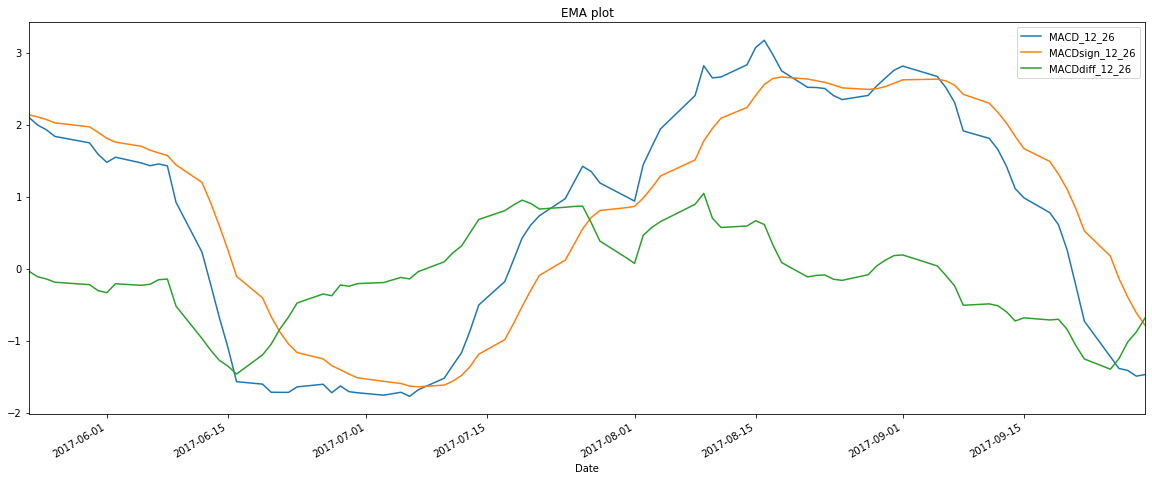

In [20]:
# MACD Analysis
plot_series(stock_macd_df, ['MACD_12_26', 'MACDsign_12_26', 'MACDdiff_12_26'], 90, 'EMA plot')

In [21]:
# Bollinger Bands = 2 std deviations away from SMA
def BBANDS(df, n):  
    MA = pd.Series(df['Close'].rolling(min_periods=1, center=False, window=n).mean(), name = 'MA1_' + str(n)) 
    MSD = pd.Series(df['Close'].rolling(min_periods=1, center=False, window=n).mean(), name = 'MSD_' + str(n))
    b1 = 4 * MSD / MA  
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = (df['Close'] - MA + 2 * MSD) / (4 * MSD)  
    B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))  
    df = df.join(B2)  
    return df

BOLLINGER BANDS


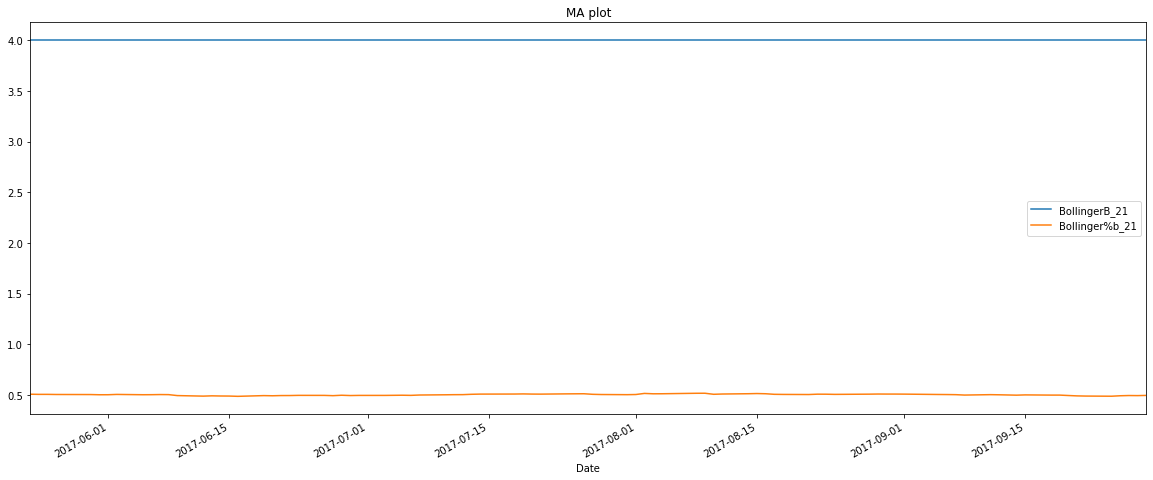

In [22]:
# Printing the Exponential Moving Average
print("BOLLINGER BANDS")
stock_bband_df = BBANDS(stock_ema_df, 21)

plot_series(stock_bband_df, ['BollingerB_21', 'Bollinger%b_21'], 90, 'MA plot')

In [23]:
# Pivot Points, Supports and Resistances  
def PPSR(df):  
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

PIVOT POINTS, SUPPORTS AND RESISTANCES


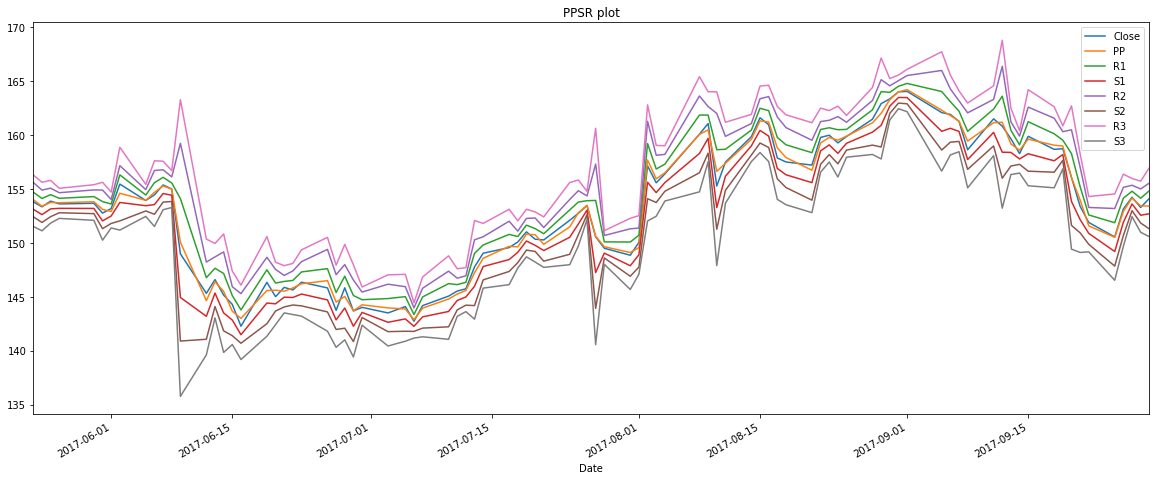

In [24]:
# Printing the Pivot Points, Supports and Resistances
print("PIVOT POINTS, SUPPORTS AND RESISTANCES")
stock_ppsr_df = PPSR(stock_ema_df)

plot_series(stock_ppsr_df, ['Close', 'PP', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3'], 90, 'PPSR plot')

In [25]:
# Now we are ready to explore two commmon Stochastic ossicilators
# Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

# Stochastic oscillator %D
def STOD(df, n):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n-1).mean(), name = 'SO%d_' + str(n))  
    df = df.join(SOd)  
    return df

STOCHASTIC OSCILLATORS


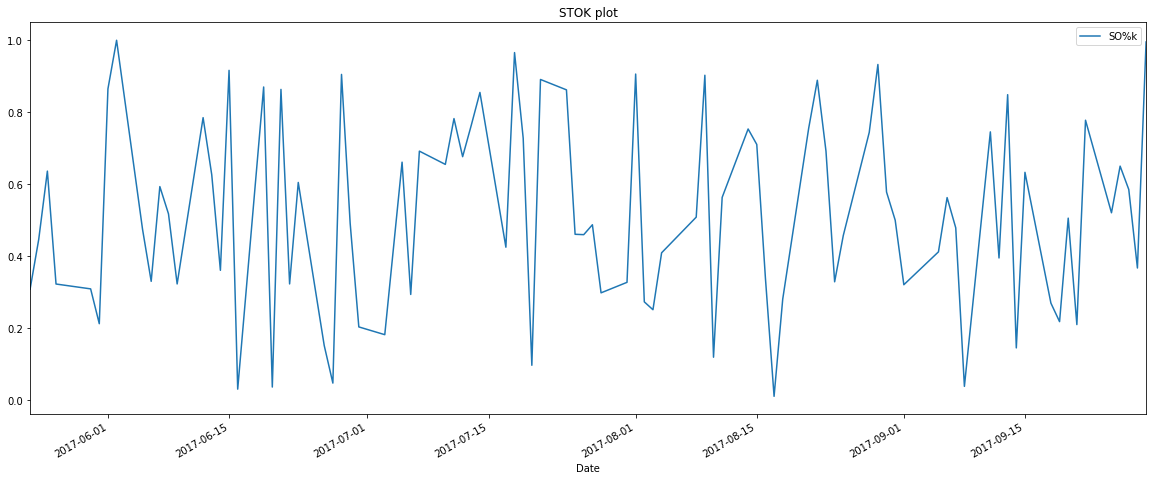

In [26]:
# Printing the Stochastic oscillator %K
print("STOCHASTIC OSCILLATORS")
stock_stok_df = STOK(stock_macd_df)

plot_series(stock_stok_df, ['SO%k'], 90, 'STOK plot')

STOCHASTIC OSCILLATORS


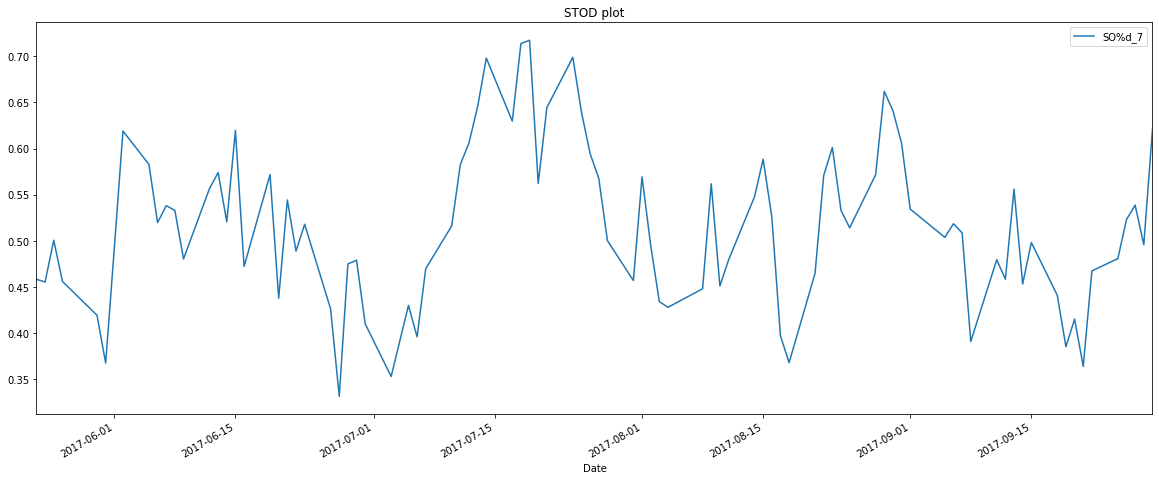

In [27]:
# Printing the Stochastic oscillator %D
print("STOCHASTIC OSCILLATORS")
stock_stod_df = STOD(stock_stok_df, 7)

plot_series(stock_stod_df, ['SO%d_7'], 90, 'STOD plot')

In [28]:
# Ultimate Oscillator = weighted average of 3 different time periods to reduce the vol / false transaction signals
def ULTOSC(df):  
    # df.index = pd.to_datetime(df.pop('Date'))
    i = 0  
    TR_l = [0]  
    BP_l = [0]  
    df.reset_index(level=0, inplace=True)
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) 
        - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        BP = df.get_value(i + 1, 'Close') 
        - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        BP_l.append(BP)  
        i = i + 1  
    UltO = pd.Series((4 * pd.Series(BP_l).rolling(window=7,center=False).sum() 
                        / pd.Series(TR_l).rolling(window=7,center=False).sum())
                     + (2 * pd.Series(BP_l).rolling(window=14,center=False).sum()
                        / pd.Series(TR_l).rolling(window=14,center=False).sum()) 
                     + (pd.Series(BP_l).rolling(window=28,center=False).sum() 
                        / pd.Series(TR_l).rolling(window=28,center=False).sum()), 
                     name = 'Ultimate_Osc')  
    df = df.join(UltO)  
    df.index = pd.to_datetime(df.pop('Date'))
    return df

ULTIMATE OSCILLATOR


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


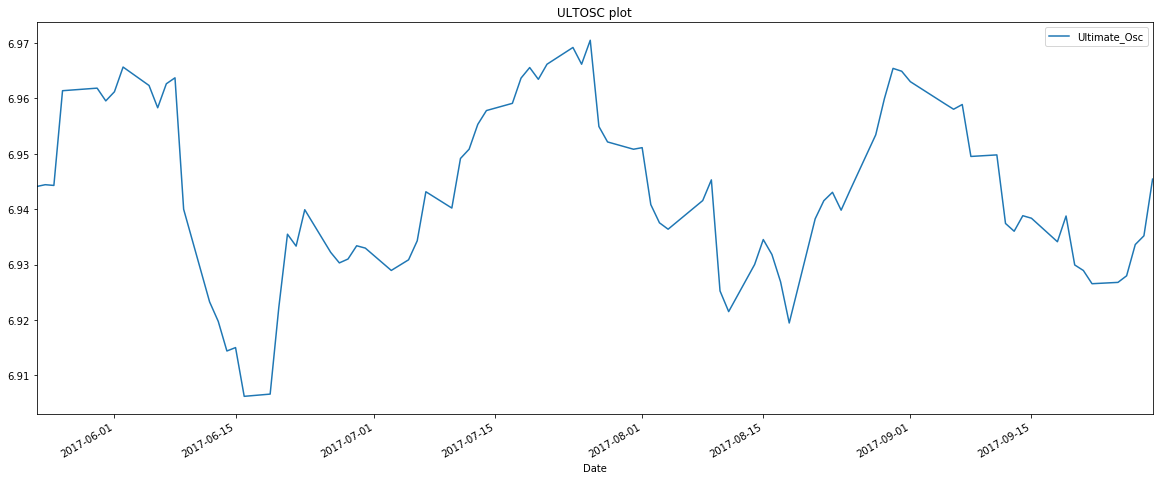

In [29]:
# Printing the Ultimate Oscillator
print("ULTIMATE OSCILLATOR")
stock_ultsoc_df = ULTOSC(stock_stod_df)

plot_series(stock_ultsoc_df, ['Ultimate_Osc'], 90, 'ULTOSC plot')